## **UP School Data Analysis Capstone Project - Ece Coşkunçay**

# **Credit Card Customer Segmentation Analysis**

Dataset :
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m

This dataset contains a wealth of customer information gathered from a portfolio of consumer credit cards to help analysts predict customer churn.

In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
# read the dataset
dataset = pd.read_csv('BankChurners.csv',lineterminator='\n')

#I did the operations with the copy of my dataset so that the dataset is not corrupted in my attempts.
df_data=dataset.copy()


# **DATASET OVERVIEW**

In [ ]:
df_data.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1343,778855383,Existing Customer,36,F,5,High School,Married,Less than $40K,Blue,17,...,1438.3,0,1438.3,1.028,1975,40,0.600,0.000,0.000093,0.999910
918,716032233,Existing Customer,42,M,2,College,Married,$80K - $120K,Blue,32,...,22120.0,1805,20315.0,0.650,3981,65,0.667,0.082,0.000111,0.999890
9978,768728508,Existing Customer,45,F,5,Doctorate,Married,Less than $40K,Gold,39,...,15987.0,1096,14891.0,0.625,14209,103,0.776,0.069,0.000310,0.999690
9553,710106933,Existing Customer,32,M,2,Uneducated,Single,$80K - $120K,Silver,20,...,34516.0,2136,32380.0,0.849,14667,119,0.750,0.062,0.000281,0.999720
2986,771833433,Attrited Customer,49,M,2,High School,Married,$80K - $120K,Blue,38,...,29893.0,0,29893.0,0.519,2063,48,0.846,0.000,0.996860,0.003139


In [ ]:
df_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


**COLUMNS**

Column name -> Description
* CLIENTNUM -> Unique identifier for each customer. (Integer)
* Attrition_Flag -> Flag indicating whether or not the customer has churned out. (Boolean)
* Customer_Age -> Age of customer. (Integer)
* Gender -> Gender of customer. (String)
* Dependent_count -> Number of dependents that customer has. (Integer)
* Education_Level -> Education level of customer. (String)
* Marital_Status -> Marital status of customer. (String)
* Income_Category -> Income category of customer. (String)
* Card_Category -> Type of card held by customer. (String)
* Months_on_book -> How long customer has been on the books. (Integer)
* Total_Relationship_Count -> Total number of relationships customer has with the credit card provider. (Integer)
* Months_Inactive_12_mon -> Number of months customer has been inactive in the last twelve months. (Integer)
* Contacts_Count_12_mon -> Number of contacts customer has had in the last twelve months. (Integer)
* Credit_Limit -> Credit limit of customer. (Integer)
* Total_Revolving_Bal -> Total revolving balance of customer. (Integer)
* Avg_Open_To_Buy -> Average open to buy ratio of customer. (Integer)
* Total_Amt_Chng_Q4_Q1 -> Total amount changed from quarter 4 to quarter 1. (Integer)
* Total_Trans_Amt -> Total transaction amount. (Integer)
* Total_Trans_Ct -> Total transaction count. (Integer)
* Total_Ct_Chng_Q4_Q1 -> Total count changed from quarter 4 to quarter 1. (Integer)
* Avg_Utilization_Ratio -> Average utilization ratio of customer. (Integer)
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 ->
Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such.


In [ ]:
# Thinking that I can both explain and show it easily, I defined a function where I can access information about the dataset at once.
#I wanted to examine the dataset with a single function.
#With this function, we can see the size of the dataset, data types, first 5 and last 5 data, whether there are null values.
def check_df(dataframe, head=5):

    # size info
    print("#"*50," Shape ","#"*50)
    print(dataframe.shape)

    # type info
    print("#"*50," Types ","#"*50)
    print(dataframe.dtypes)
    #print(dataframe.info())


    #First 5 records
    print("#"*50," Head ","#"*50)
    print(dataframe.head(head))

    #Last 5 records
    print("\n","#"*50,"Tail","#"*50)
    print(dataframe.tail(head))

    #There are any missing values in the data set
    print("#"*50," NA ","#"*50)
    print(dataframe.isnull().sum())

In [ ]:
check_df(df_data)

##################################################  Shape  ##################################################
(10127, 23)
##################################################  Types  ##################################################
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                           

My dataset consists of 10127 rows and 23 columns.
There are no null/missing values.

# **Data Preprocessing**

I removed the $ sign in the income category column for both ease of use and to avoid erroneous results.

In [ ]:
#deleting $ sign
df_data['Income_Category'] = df_data['Income_Category'].str.replace('$',"")

<ipython-input-7-525a3ddfd4e3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_data['Income_Category'] = df_data['Income_Category'].str.replace('$',"")


In [ ]:
df_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,60K - 80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than 40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,80K - 120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than 40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,60K - 80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df_data.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3351,721213833,Existing Customer,46,F,2,High School,Unknown,Unknown,Blue,32,...,7966.0,1423,6543.0,0.987,3780,75,0.923,0.179,0.000090,0.99991
215,713837058,Existing Customer,48,M,2,College,Single,Less than 40K,Blue,36,...,2571.0,1955,616.0,0.531,1234,24,0.714,0.760,0.000186,0.99981
556,710462433,Existing Customer,45,M,4,Graduate,Single,60K - 80K,Blue,30,...,17625.0,894,16731.0,1.285,1773,39,1.053,0.051,0.000119,0.99988
7408,789820308,Existing Customer,50,F,3,Graduate,Married,Less than 40K,Blue,40,...,2925.0,2065,860.0,0.692,3913,47,1.474,0.706,0.000118,0.99988
1861,719283633,Existing Customer,57,F,3,Uneducated,Married,40K - 60K,Blue,49,...,7578.0,1628,5950.0,0.721,1325,29,1.231,0.215,0.000204,0.99980


I used the unique function to see what values are contained in some columns and see what values each column contains.

In [ ]:
df_data['Attrition_Flag'].unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
df_data['Customer_Age'].sort_values().unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73])

In [ ]:
df_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_data['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

In [ ]:
df_data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
df_data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
df_data['Income_Category'].sort_values().unique()

array(['120K +', '40K - 60K', '60K - 80K', '80K - 120K', 'Less than 40K',
       'Unknown'], dtype=object)

In [ ]:
df_data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
df_data['Months_on_book'].sort_values().unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

In [ ]:
df_data['Credit_Limit'].unique()

array([12691.,  8256.,  3418., ...,  5409.,  5281., 10388.])

Some columns had unknown values, just like null values, I thought that having unknown data would affect my analysis so I removed the rows with unknown values.

In [ ]:
# removing unknown values
df_data = df_data[df_data['Education_Level'] != 'Unknown'] #removing education levels that are unknown
df_data.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) == 'unknown').sum()

CLIENTNUM                                                                                                                               0
Attrition_Flag                                                                                                                          0
Customer_Age                                                                                                                            0
Gender                                                                                                                                  0
Dependent_count                                                                                                                         0
Education_Level                                                                                                                         0
Marital_Status                                                                                                                        635
Income_Category                   

In [ ]:
df_data = df_data[df_data['Marital_Status'] != 'Unknown'] #removing martial status that are unknown
df_data.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) == 'unknown').sum()

CLIENTNUM                                                                                                                               0
Attrition_Flag                                                                                                                          0
Customer_Age                                                                                                                            0
Gender                                                                                                                                  0
Dependent_count                                                                                                                         0
Education_Level                                                                                                                         0
Marital_Status                                                                                                                          0
Income_Category                   

In [ ]:
df_data = df_data[df_data['Income_Category'] != 'Unknown'] #removing income category that are unknown
df_data.applymap(lambda x: str(x).lower()).applymap(lambda x: str(x) == 'unknown').sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
check_df(df_data) #to check the number of data that is still available

##################################################  Shape  ##################################################
(7081, 23)
##################################################  Types  ##################################################
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                            

 When all unknown values were deleted, the initial 10127 lines of data were reduced to 7081 lines.

Data has been clean by removing 'Unknown' variable in the data

In [ ]:
df_data.sample(5)#taking random sample

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
5265,780292683,Attrited Customer,55,M,1,Uneducated,Single,120K +,Blue,41,...,24542.0,2354,22188.0,0.314,984,24,0.263,0.096,0.998340,0.001658
1207,717567333,Existing Customer,35,M,3,Graduate,Married,60K - 80K,Blue,26,...,3991.0,1982,2009.0,0.748,1661,35,0.944,0.497,0.000187,0.999810
7270,827123883,Existing Customer,53,M,4,High School,Single,60K - 80K,Blue,49,...,3858.0,0,3858.0,0.670,4472,92,0.614,0.000,0.000056,0.999940
1848,781933983,Existing Customer,47,M,4,Graduate,Married,40K - 60K,Blue,41,...,14535.0,0,14535.0,0.711,2970,76,0.689,0.000,0.000541,0.999460
4597,712817808,Existing Customer,39,M,2,Graduate,Married,60K - 80K,Blue,23,...,4761.0,1561,3200.0,0.690,2045,53,1.650,0.328,0.000069,0.999930


# **ANALYZES AND VISUALIZATIONS**  

**1. Existing and Attrited Customers**

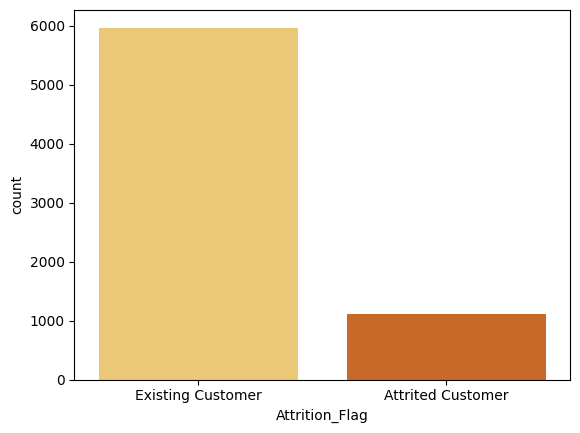

In [ ]:
sns.countplot(x='Attrition_Flag',data=df_data,palette='YlOrBr' );

In [ ]:
df_data['Attrition_Flag'].value_counts()

Existing Customer    5968
Attrited Customer    1113
Name: Attrition_Flag, dtype: int64

There are 5968 customers who are existing and 1113 customers who have attrited. The Attrition_Flag column gives the count of customers in each category.

**2. Gender Distribution of Customers**

In [ ]:
df_data['Gender'].value_counts()

M    3706
F    3375
Name: Gender, dtype: int64

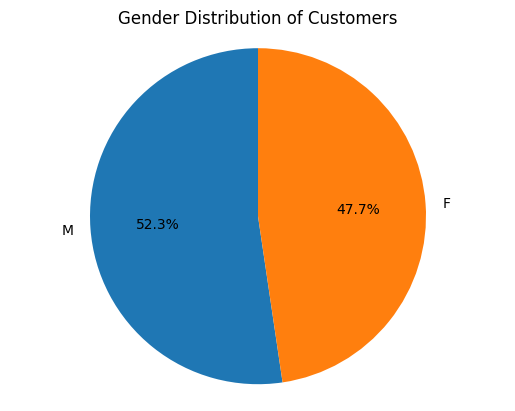

In [ ]:
# Gender distribution pie plot
plt.pie(df_data['Gender'].value_counts().values, labels=df_data['Gender'].value_counts().index, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution of Customers')
plt.show()

**3. Existing and attrited customers by gender**

In [ ]:
# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()

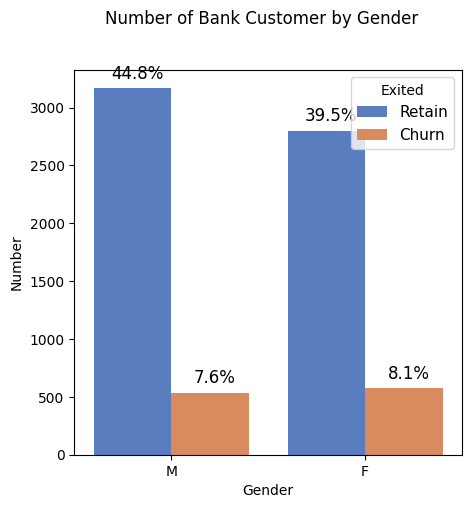

In [ ]:
# initialize chart title
chart = 'Number of Bank Customer by Gender'

# apply the procedure to plot the chart
countplot_univariate(df_data, 'Gender', 'Attrition_Flag', 'Gender', 0, 0, None, 5, 5, 1, \
                     'vertical', chart)

**4. Age distribution of customers**

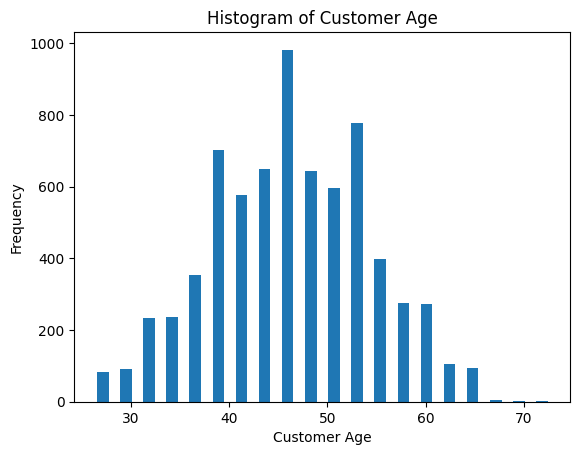

In [ ]:
df_data['Customer_Age'].plot.hist(rwidth=0.5, bins=20)
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.title("Histogram of Customer Age")
plt.show()

In [ ]:
df_data['Customer_Age'].value_counts()

46    337
45    331
44    326
49    326
43    322
48    319
50    317
47    314
42    297
53    288
51    280
41    279
52    273
40    244
39    238
38    219
54    216
55    209
37    196
56    190
57    163
36    158
35    132
59    116
58    113
34    105
33     95
60     89
32     75
61     68
65     64
31     64
62     60
30     48
26     48
29     44
63     44
64     31
27     21
28     15
67      3
70      1
73      1
68      1
66      1
Name: Customer_Age, dtype: int64

We see that the most common age is 46. 337 customers were 46 years old. the minimum number of ages are 66, 68, 70 and 73 and there is only 1 customer from each.

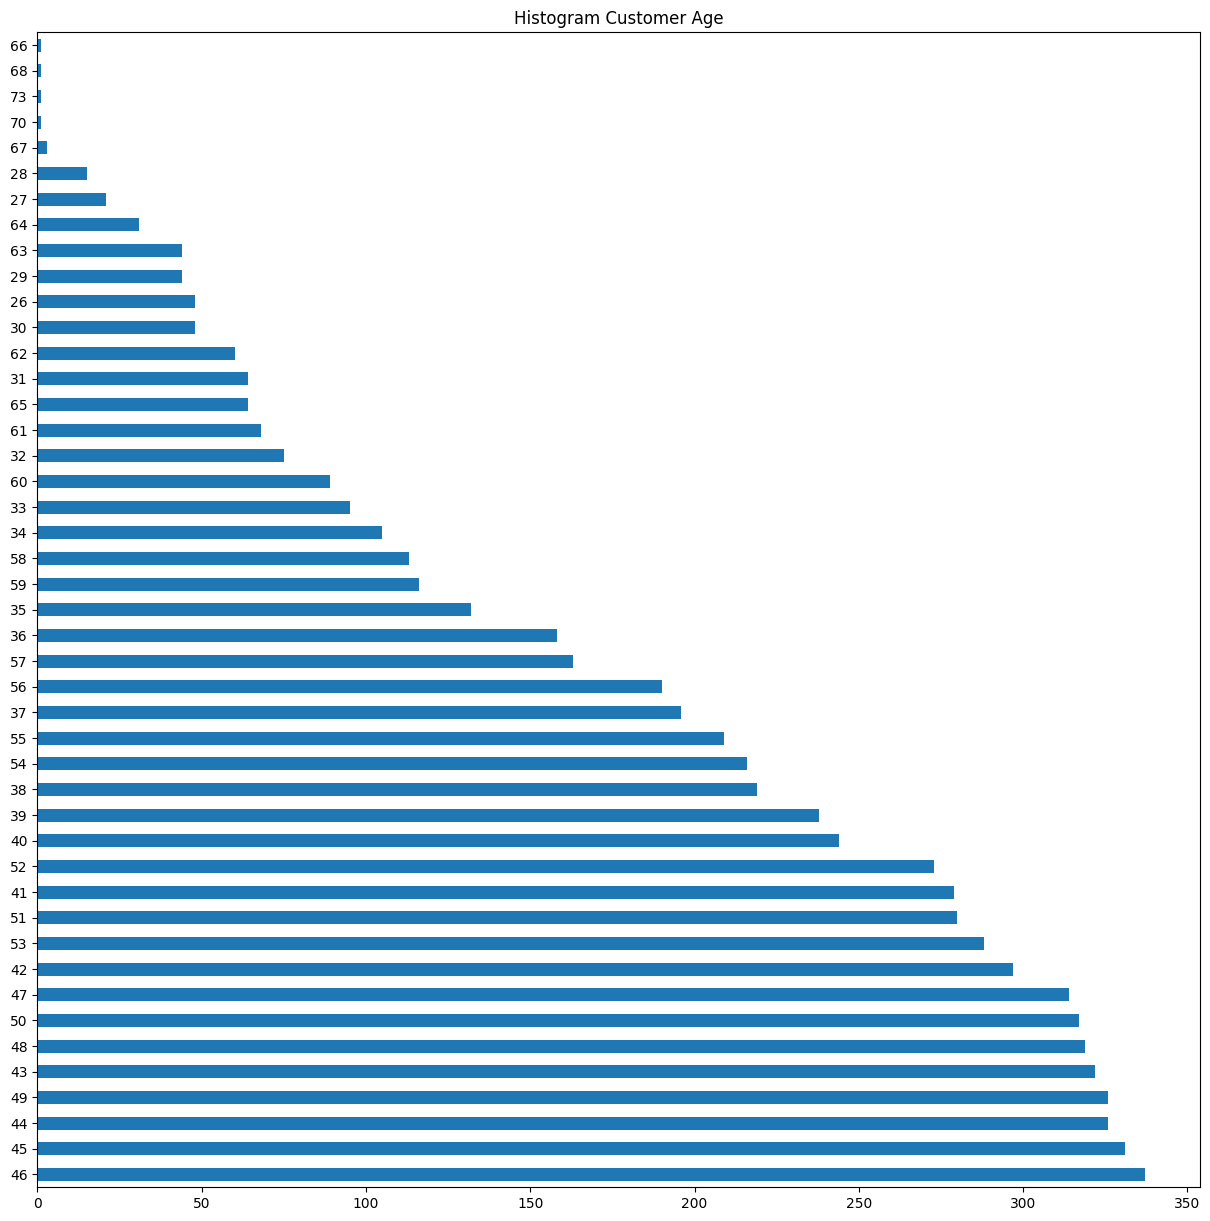

In [ ]:
df_data['Customer_Age'].value_counts().plot.barh(figsize=(15, 15)).set_title("Histogram Customer Age");

**5. Distribution of customers by age groups**

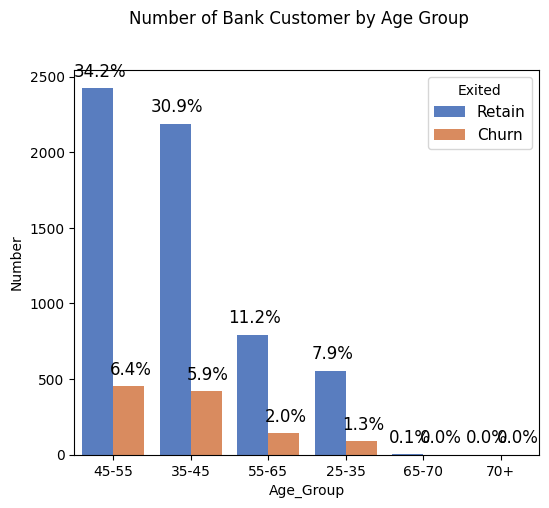

In [ ]:
#YAŞ GRUPLARINA GÖRE DAĞILIMI
df_data['Age_Group'] = pd.cut(df_data['Customer_Age'], bins=[25,35,45,55,65,70, np.inf], labels=['25-35', '35-45', '45-55', '55-65', '65-70','70+'])

# initialize chart title
chart = 'Number of Bank Customer by Age Group'

# apply the procedure to plot the chart
countplot_univariate(df_data, 'Age_Group', 'Attrition_Flag', 'Age_Group', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

In [ ]:
#df_data[["Gender","Attrition_Flag","Age_Group"]].value_counts()
df_data.groupby(["Gender","Age_Group"])[["Attrition_Flag"]].value_counts()

Gender  Age_Group  Attrition_Flag   
F       25-35      Existing Customer     255
                   Attrited Customer      44
        35-45      Existing Customer    1033
                   Attrited Customer     229
        45-55      Existing Customer    1129
                   Attrited Customer     236
        55-65      Existing Customer     380
                   Attrited Customer      67
        65-70      Existing Customer       2
                   Attrited Customer       0
        70+        Existing Customer       0
                   Attrited Customer       0
M       25-35      Existing Customer     301
                   Attrited Customer      47
        35-45      Existing Customer    1156
                   Attrited Customer     192
        45-55      Existing Customer    1295
                   Attrited Customer     219
        55-65      Existing Customer     413
                   Attrited Customer      78
        65-70      Existing Customer       3
                  

In general, the most common ages are between 42 and 54, and the frequency decreases as age increases or decreases from this range. Ages with the lowest numbers are under 30 and over 65.

**6. The number of dependents of the customers**

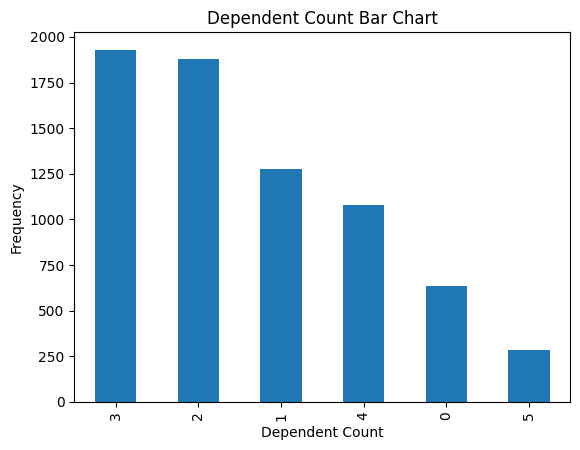

In [ ]:
#müşterilerin bakmakla yükümlü oldugu kişi sayısına bakalım
dependent_count= df_data['Dependent_count'].value_counts()
dependent_count.plot(kind='bar')
plt.xlabel("Dependent Count")
plt.ylabel("Frequency")
plt.title("Dependent Count Bar Chart")
plt.show()


In [ ]:
df_data['Dependent_count'].value_counts()

3    1929
2    1880
1    1274
4    1077
0     636
5     285
Name: Dependent_count, dtype: int64

When we examine the number of dependents of a customer, we see that the most common number is 3. The number of dependents of 1929 customers is 3. Then it is 2 with 1880 customers. There are 1274 customers for 1 person and 1077 customers for 4 people. The least common are 0 and 5, with 636 and 285 customers, respectively.

**7. Marital Status Distribution**

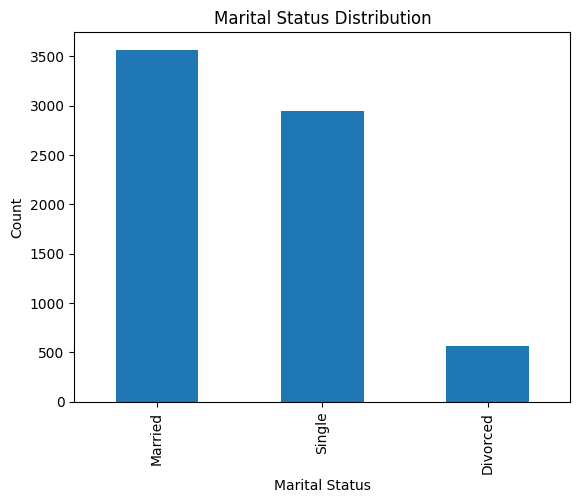

In [ ]:
df_data['Marital_Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

In [ ]:
df_data['Marital_Status'].value_counts()

Married     3564
Single      2948
Divorced     569
Name: Marital_Status, dtype: int64

In general, we see that 3564 of the customers in the dataset are married, 2948 are single and 569 are divorced. Now let's examine this by gender.

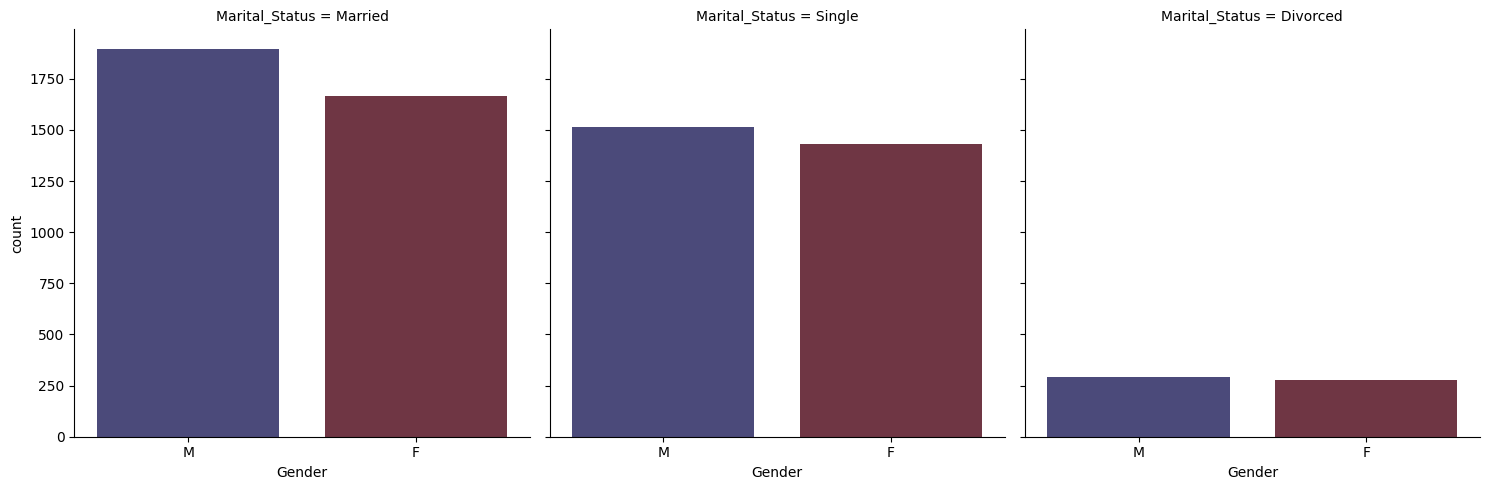

In [ ]:
sns.catplot(x='Gender',data=df_data,palette='icefire',kind='count',col='Marital_Status');

**8.Existing and attrited customers by marital status and gender**

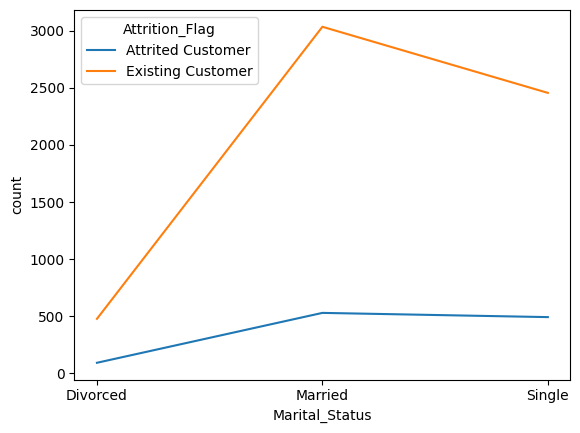

In [ ]:
#Birleştireceğim veri setleri içinden ilgili sütunları seçelim.

d1 = df_data[["Gender","Marital_Status","Attrition_Flag"]]

df=d1.groupby(by=["Attrition_Flag","Marital_Status"]).Gender.agg(["count"])
sns.lineplot(x = "Marital_Status", y = "count", hue = "Attrition_Flag", data = df);


In [ ]:
df

count
Attrition_Flag    Marital_Status       
Attrited Customer Divorced           92
                  Married           529
                  Single            492
Existing Customer Divorced          477
                  Married          3035
                  Single           2456

When the marital status of the customers who attrited is examined, the number of divorced people is 92, the number of married customers is 529, and the number of single customers is 492. Likewise, 477 of the existing customers are divorced, 3035 are married, 2456 are single.

**9. Distribution of Income Category**

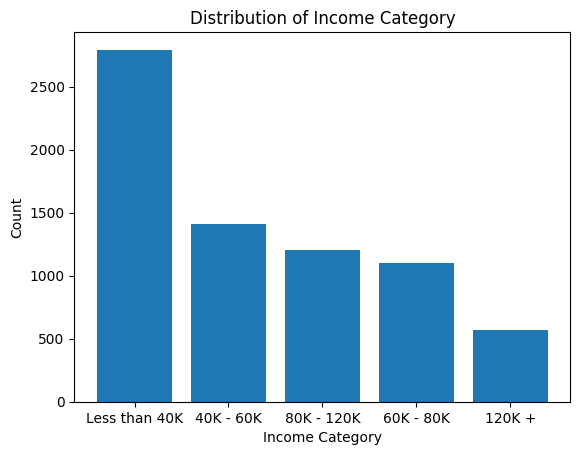

In [ ]:
value_counts = df_data['Income_Category'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Category')
plt.show()

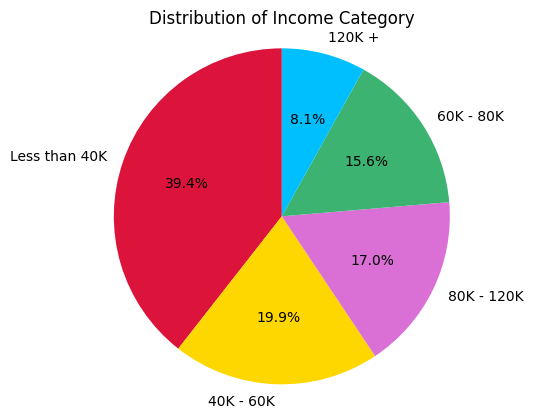

In [ ]:
value_counts = df_data['Income_Category'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, startangle=90,autopct='%1.1f%%',colors=['Crimson', 'Gold', 'Orchid', 'MediumSeaGreen','DeepSkyBlue'] )
plt.axis('equal')
plt.title('Distribution of Income Category')
plt.show()

**10. Distribution of card category (What type of card category are most used?(**

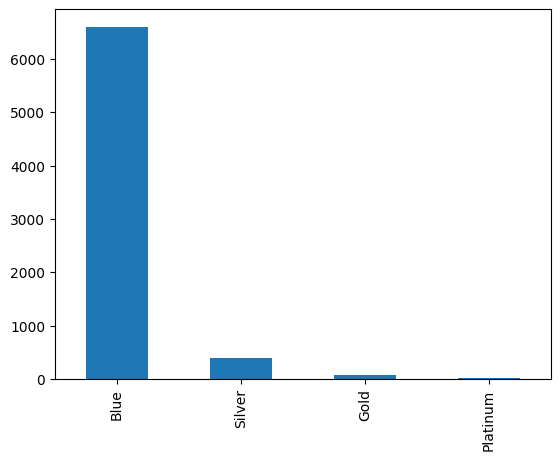

In [ ]:
df_data.Card_Category.value_counts().plot(kind='bar');


**11. Is there a relationship between card type and income category?**

In [ ]:
#Income category and card type relationship
df_data.groupby('Card_Category')['Income_Category'].describe()

,count,unique,top,freq
Card_Category,,,,
Blue,6598,5,Less than 40K,2669
Gold,81,5,60K - 80K,22
Platinum,11,4,120K +,4
Silver,391,5,Less than 40K,101


<Axes: xlabel='Income_Category', ylabel='count'>

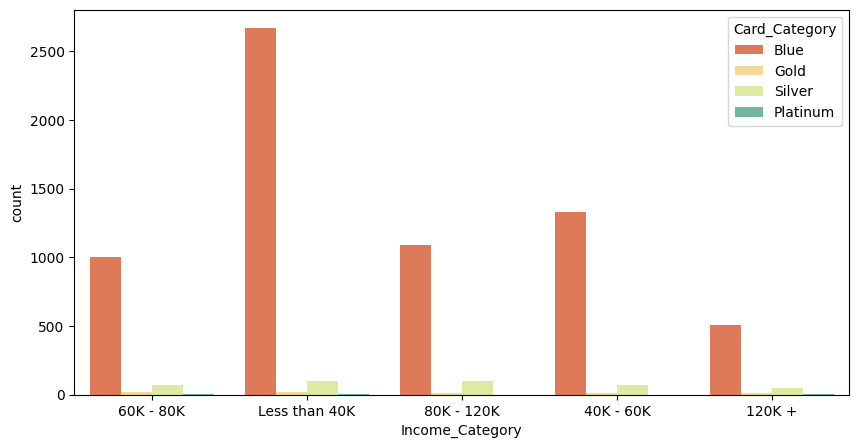

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_data,palette='Spectral',hue='Card_Category')

**12. Education Level of Customers**

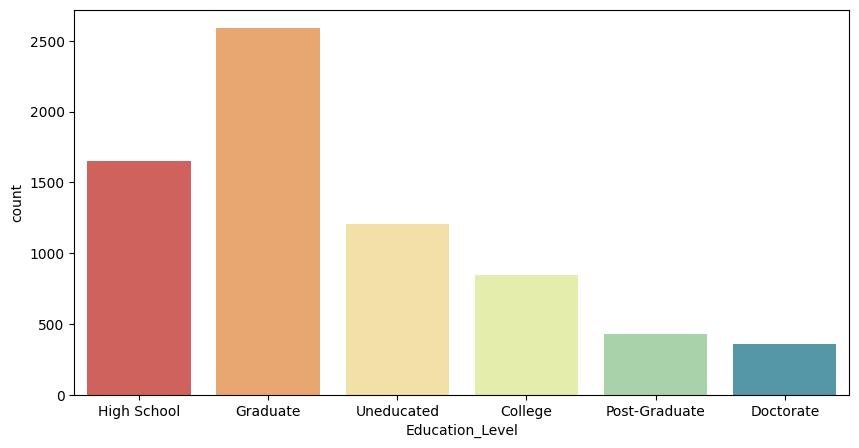

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(x='Education_Level',data=df_data,palette='Spectral');

In [ ]:
df_data.Education_Level.value_counts()

Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: Education_Level, dtype: int64

When we look at the education level in general, we see that most of the customers have graduate and high school degrees.

**13.Is there a relationship between the education level of customers and their income?**

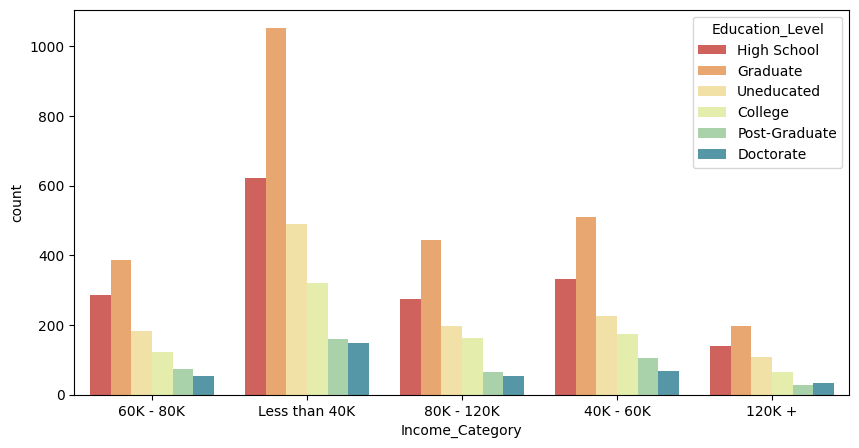

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income_Category',data=df_data,palette='Spectral',hue='Education_Level');

In this part, I thought that there would be a relationship between the education level of the customers and their income, but as you can see, it cannot be said that there is a relationship. even at all education levels, we can see that the income level of a large part of them is less than 40K compared to the others.

**14. Is there a relationship between income and attrition?**

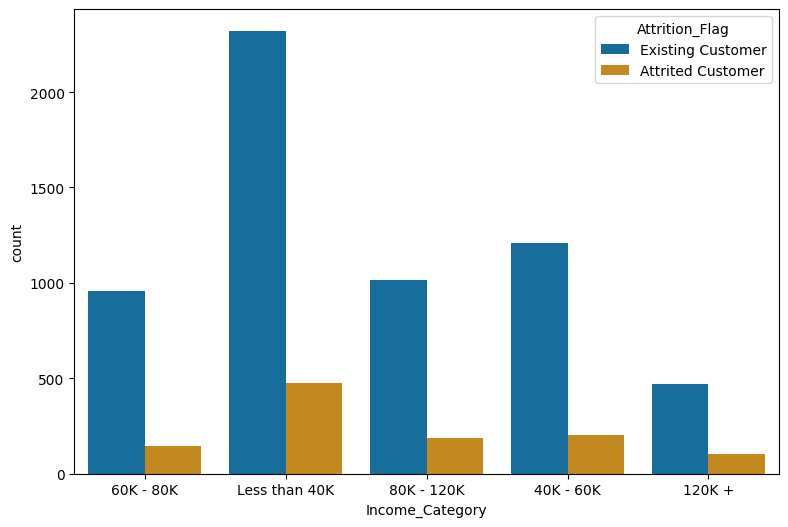

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'colorblind', data = df_data)
plt.show()

Again, it cannot be said that there is a relationship.

**15. Card category and Education level**

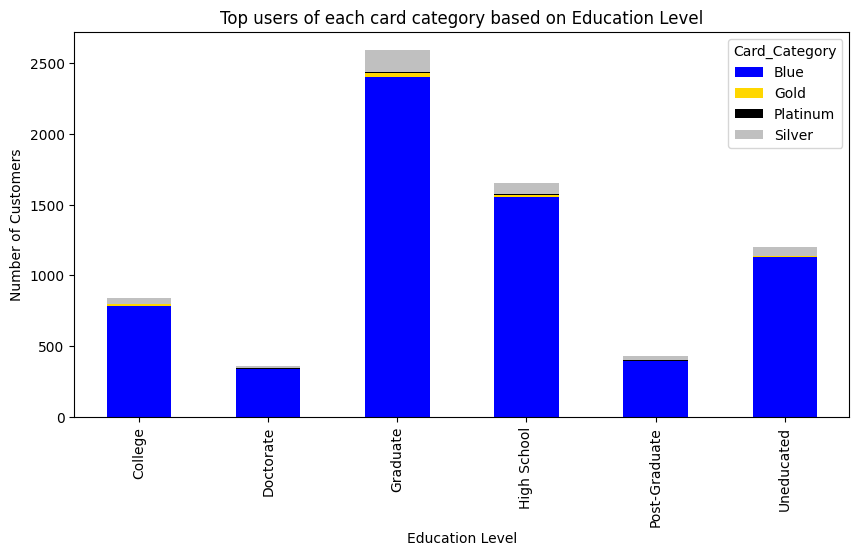

In [ ]:
#Card_Category and Education_Level
# group the data by Card_Category and Education_Level and calculate the count of customers in each group
grouped = df_data.groupby(['Card_Category', 'Education_Level']).size().reset_index(name='counts')

# pivot the data to have the counts as values, Card_Category as columns, and Education_Level as index
pivot = grouped.pivot(index='Education_Level', columns='Card_Category', values='counts')
pivot.plot(kind='bar', stacked=True, figsize=(10,5), color={"Blue": "blue", "Gold": "gold","Platinum":"black","Silver":"#C0C0C0"})
plt.title('Top users of each card category based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

**16. How long does it take customers to leave?**

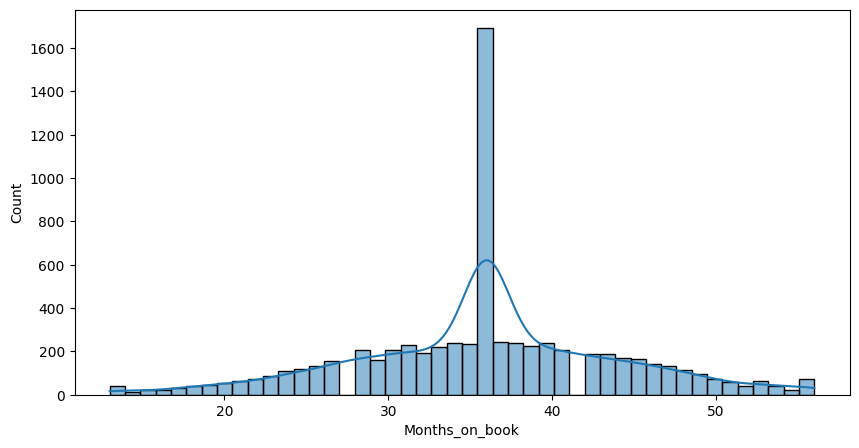

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book',data=df_data,kde=True);

After the customers started to receive service, the maximum separation occurred after 36 months.

**16. Contacts_Count_12_mon VS. Months_Inactive_12_mon**

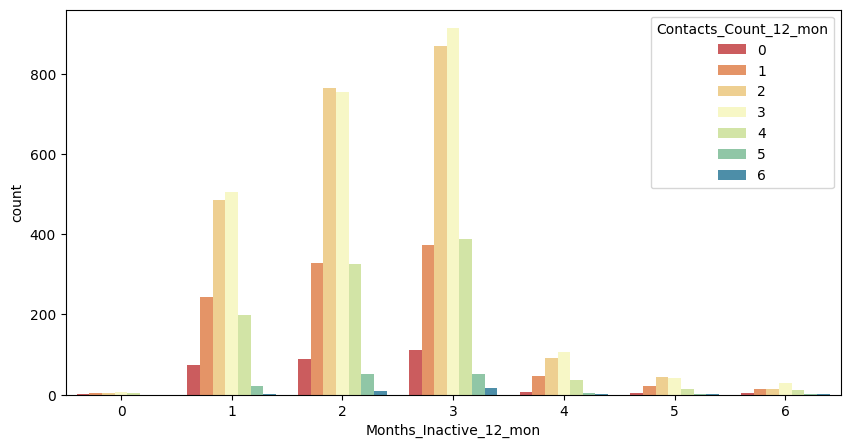

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Months_Inactive_12_mon',data=df_data,palette='Spectral',hue='Contacts_Count_12_mon');

It is the normal distribution over all months.

17. Total transaction amount VS. Total transaction count

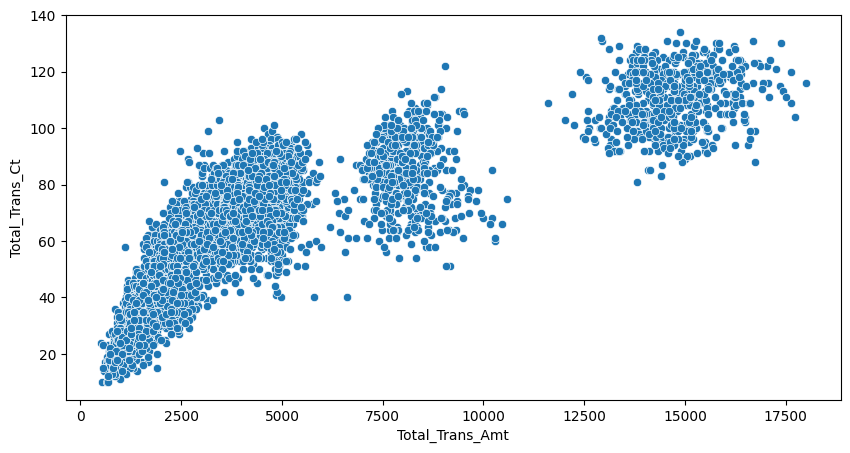

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df_data);

We can classify the customers into three segments.

